In [22]:
import pandas as pd
import pandas.io.data as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

start = datetime.datetime(2016,1,1)
end = datetime.date.today()
apple = web.DataReader("AAPL","yahoo", start, end)
 
type(apple)

pandas.core.frame.DataFrame

In [23]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 


Populating the interactive namespace from numpy and matplotlib


In [24]:
apple_sent = pd.read_csv("AAPL_conv.csv",usecols = ["symbol","bull_scored_messages","bear_scored_messages","asof_date"])

In [25]:
apple_sent=apple_sent.drop_duplicates()
apple_sent['asof_date'] = pd.to_datetime(apple_sent['asof_date'])


In [26]:
apple_sent.rename(columns={'asof_date': 'Date'}, inplace=True)

In [27]:
apple_sent = apple_sent.set_index('Date')

In [28]:
apple = pd.merge(apple, apple_sent, how = 'inner',left_index=True, right_index=True)

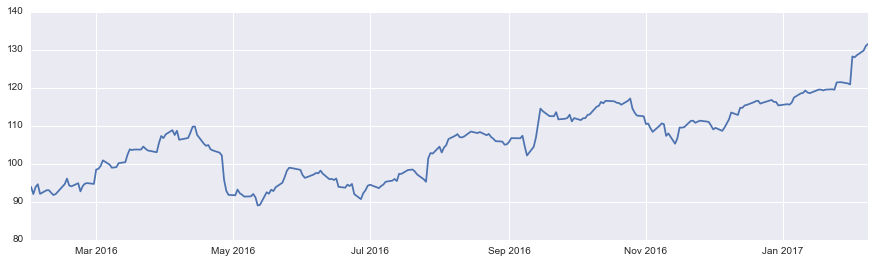

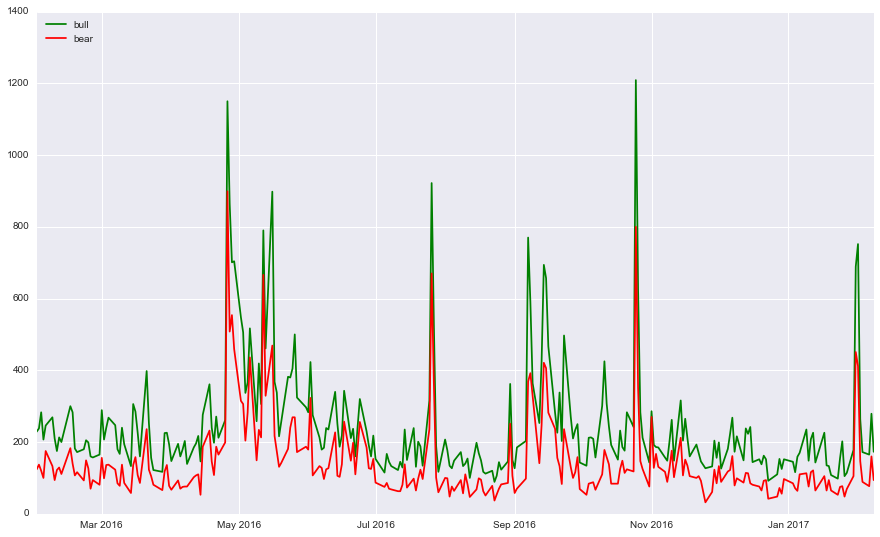

In [29]:

plt.subplot(211)
plt.plot(apple["Adj Close"])
fig, ax = plt.subplots()
ax.set_color_cycle(['green', 'red'])
plt.plot(apple['bull_scored_messages'])
plt.plot(apple['bear_scored_messages'])
plt.legend(['bull', 'bear'],loc='upper left')
plt.show()


In [33]:
apple.reset_index(inplace= True)

In [34]:
import datetime
apple["year_mon"]=apple["Date"].dt.year.map(str)+'-'+apple["Date"].dt.month.map(str)
#apple["month"]=apple["Date"].dt.month
#apple["year_month"]=apple["year"].str()+apple["month"].str()
#apple

In [35]:
apple_t=pd.melt(apple[['Date','year_mon','bull_scored_messages','bear_scored_messages']], id_vars=["Date","year_mon"],
       var_name="mssg_type",value_name='Total_msgs')

In [37]:
apple_t = apple_t.sort('Date',ascending= True)

/Users/amit/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


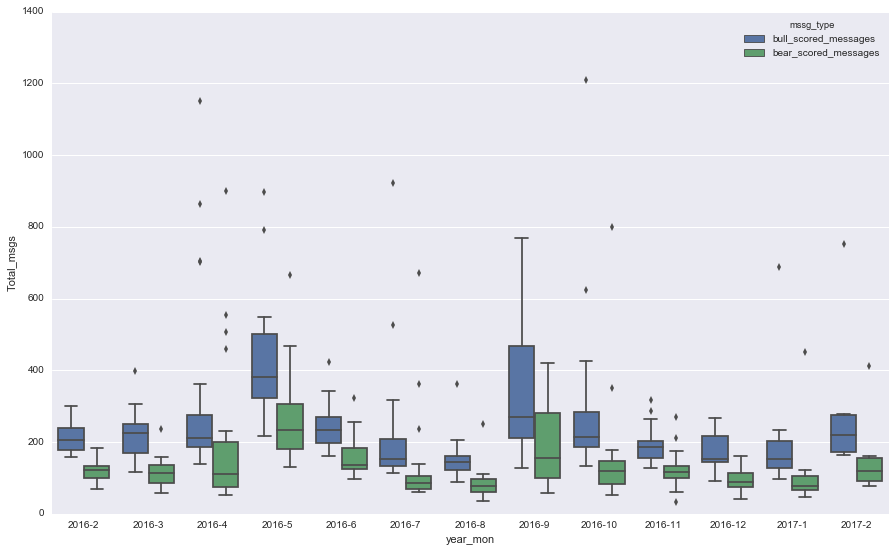

In [38]:
sns.boxplot(x="year_mon", y="Total_msgs", hue="mssg_type", data=apple_t);

In [39]:
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
clf = web.DataReader("CLF","yahoo", start, end)


In [40]:
clf_sent = pd.read_csv("CLF.csv",usecols = ["symbol","bull_scored_messages","bear_scored_messages","asof_date"])
clf_sent=clf_sent.drop_duplicates()
clf_sent['asof_date'] = pd.to_datetime(clf_sent['asof_date'])
clf_sent.rename(columns={'asof_date': 'Date'}, inplace=True)
clf_sent = clf_sent.set_index('Date')
clf = pd.merge(clf, clf_sent, how = 'inner',left_index=True, right_index=True)

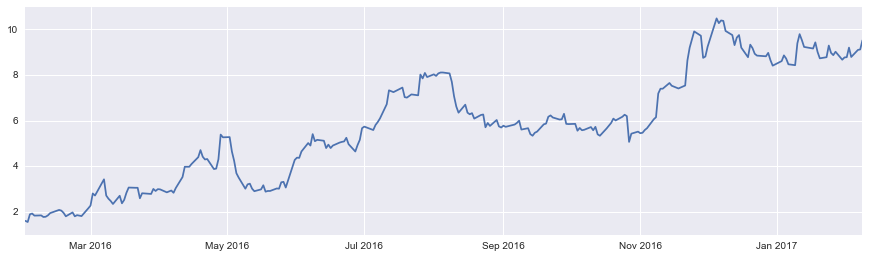

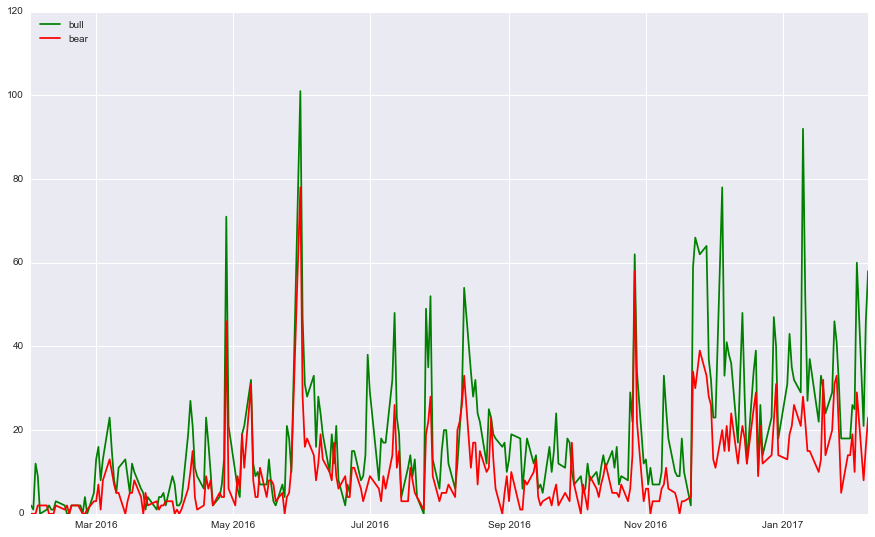

In [41]:
plt.subplot(211)
plt.plot(clf["Adj Close"])
fig, ax = plt.subplots()
ax.set_color_cycle(['green', 'red'])
plt.plot(clf['bull_scored_messages'])
plt.plot(clf['bear_scored_messages'])
plt.legend(['bull', 'bear'],loc='upper left')
plt.show()

In [42]:
clf.reset_index(inplace= True)
import datetime
clf["year_mon"]=clf["Date"].dt.year.map(str)+'-'+clf["Date"].dt.month.map(str)
clf_t=pd.melt(clf[['Date','year_mon','bull_scored_messages','bear_scored_messages']], id_vars=["Date","year_mon"],
       var_name="mssg_type",value_name='Total_msgs')
clf_t = clf_t.sort('Date',ascending= True)

/Users/amit/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


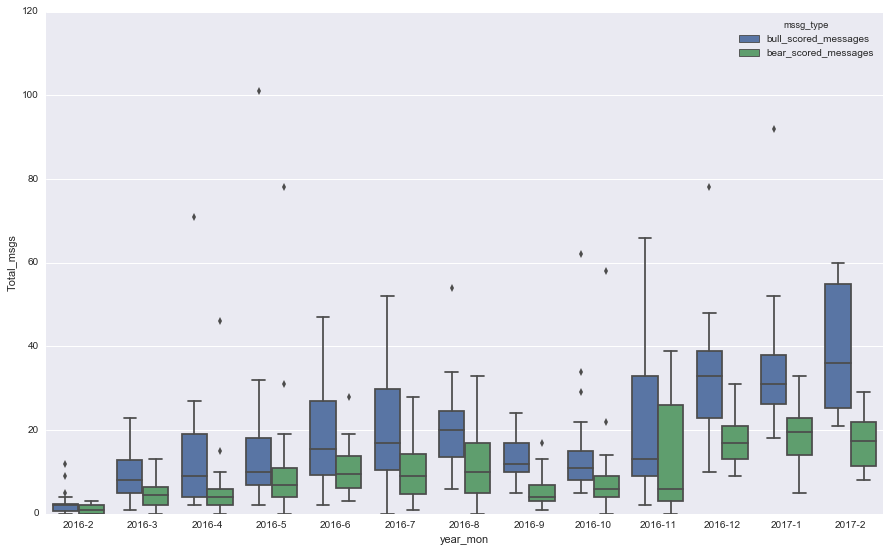

In [43]:
sns.boxplot(x="year_mon", y="Total_msgs", hue="mssg_type", data=clf_t)